In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn
import contextily
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import contextily as ctx


## Similar Score Difference Liberty

In [2]:
sim_score_diff_liberty_data = r'C:/Users/jespi/eagle/carb-climate-index-15/similarity_score_difference_liberty/'

In [3]:
# Load the shapefile
sim_score_diff = gpd.read_file(sim_score_diff_liberty_data)

In [4]:
sim_score_diff.columns

Index(['layer', 'x', 'y', 'lon', 'lat', 'nearest_ne', 'layer_new', 'x_new',
       'y_new', 'lon_new', 'lat_new', 'layer_diff', 'geometry'],
      dtype='object')

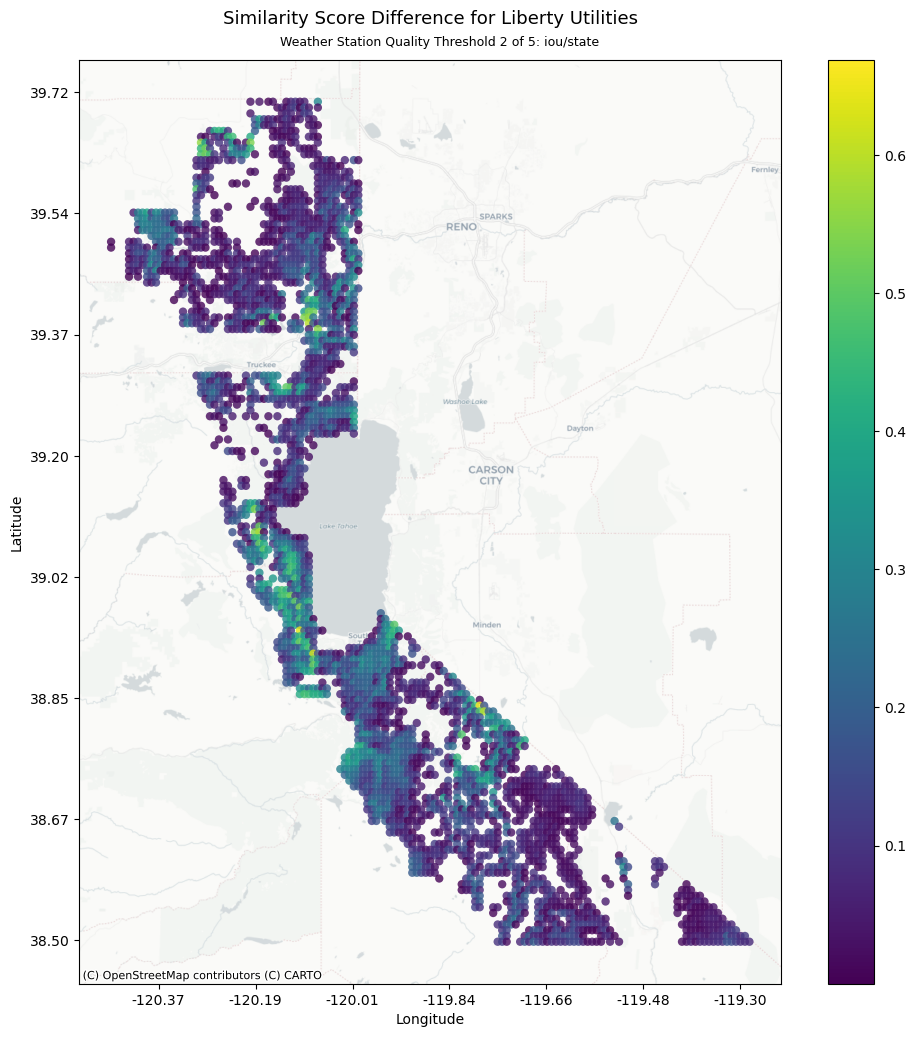

In [5]:
import matplotlib.ticker as mticker
from pyproj import Transformer

# Transformer to convert EPSG:3857 to EPSG:4326
transformer = Transformer.from_crs(3857, 4326, always_xy=True)

def meters_to_lonlat(x, y):
    lon, lat = transformer.transform(x, y)
    return lon, lat

# Set up a formatter for the ticks
def lon_formatter(x, pos):
    return f"{meters_to_lonlat(x, 0)[0]:.2f}"

def lat_formatter(y, pos):
    return f"{meters_to_lonlat(0, y)[1]:.2f}"

# Plot the map in EPSG:3857
gdf = sim_score_diff.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Choropleth map
gdf.plot(column='layer_diff',
         cmap='viridis',
         linewidth=0.1,
         edgecolor='none',
         alpha=0.8,
         legend=True,
         ax=ax)

# Add the base map
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Customize the tick labels for lon/lat
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lat_formatter))

# Add title and labels
plt.title('Similarity Score Difference for Liberty Utilities', x=0.5, y=1.03, fontsize=13)
plt.suptitle('Weather Station Quality Threshold 2 of 5: iou/state', fontsize=9, x=0.46, y=0.9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the figure before showing it
plt.savefig('updated_positive_improvement_similarity_score_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [6]:
# Check if 'layer_diff' column exists
if 'layer_diff' in sim_score_diff.columns:
    # Get summary statistics for 'layer_diff' column
    summary_stats = sim_score_diff['layer_diff'].describe()
    print(summary_stats)
else:
    print("The 'layer_diff' column does not exist in the GeoDataFrame.")


count    3124.000000
mean        0.127886
std         0.109772
min         0.000035
25%         0.042345
50%         0.099066
75%         0.184679
max         0.668842
Name: layer_diff, dtype: float64


## Updated Liberty Station Score

In [7]:
sim_score_updated_liberty_data = r'C:/Users/jespi/eagle/carb-climate-index-15/updated_liberty_station_similarity_score/'

In [8]:
# Load the shapefile
sim_score_updated = gpd.read_file(sim_score_updated_liberty_data)

In [9]:
sim_score_updated.columns

Index(['layer_new', 'x_new', 'y_new', 'lon_new', 'lat_new', 'geometry'], dtype='object')

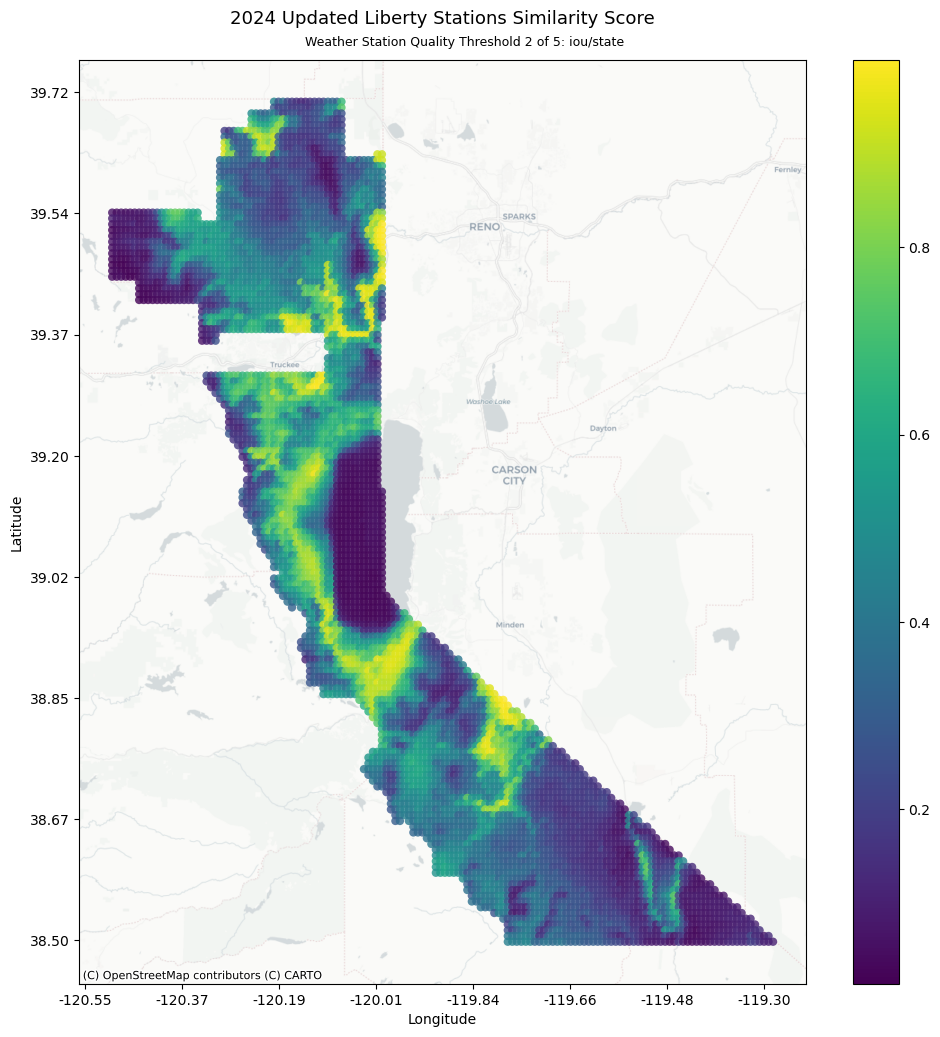

In [10]:
import matplotlib.ticker as mticker
from pyproj import Transformer

# Transformer to convert EPSG:3857 to EPSG:4326
transformer = Transformer.from_crs(3857, 4326, always_xy=True)

def meters_to_lonlat(x, y):
    lon, lat = transformer.transform(x, y)
    return lon, lat

# Set up a formatter for the ticks
def lon_formatter(x, pos):
    return f"{meters_to_lonlat(x, 0)[0]:.2f}"

def lat_formatter(y, pos):
    return f"{meters_to_lonlat(0, y)[1]:.2f}"

# Plot the map in EPSG:3857
gdf = sim_score_updated.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Choropleth map
gdf.plot(column='layer_new',
         cmap='viridis',
         linewidth=0.1,
         edgecolor='none',
         alpha=0.8,
         legend=True,
         ax=ax)

# Add the base map
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Customize the tick labels for lon/lat
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lat_formatter))

# Add title and labels
plt.title('2024 Updated Liberty Stations Similarity Score', x=0.5, y=1.03, fontsize=13)
plt.suptitle('Weather Station Quality Threshold 2 of 5: iou/state', fontsize=9, x=0.46, y=0.9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the figure before showing it
plt.savefig('updated_liberty_stations_similarity_score.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [11]:
# Check if 'layer_diff' column exists
if 'layer_new' in sim_score_updated.columns:
    # Get summary statistics for 'layer_diff' column
    summary_stats = sim_score_updated['layer_new'].describe()
    print(summary_stats)
else:
    print("The 'layer_diff' column does not exist in the GeoDataFrame.")


count    5667.000000
mean        0.389202
std         0.246298
min         0.013883
25%         0.191634
50%         0.351625
75%         0.547545
max         0.999999
Name: layer_new, dtype: float64
